In [27]:
import pandas as pd
import numpy as np
import urllib
from urllib import request
import sklearn 
from statistics import mean 
import statistics
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from datetime import time
from sklearn import feature_selection

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection

In [31]:
from sklearn import preprocessing

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import label_binarize
from random import seed
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [34]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
########################sanika##############
import time
import os
from selenium import webdriver
from webbot import Browser
from zipfile import ZipFile
############################################

In [37]:
#########################
def scraping_script_prediction():
    global train_year, train_quarter, test_year,test_quarter,year_file_list
    train_year=input('Enter train year')
    train_quarter=input('Enter train quarter')
    test_year=input('Enter test year')
    test_quarter=input('Enter test quarter')
    auto_login()
    year_file_list=zip_file()
    extract_zip()

def auto_login():
    global driver
    driver = Browser()
    driver.go_to('https://freddiemac.embs.com/FLoan/Data/download.php')
    #driver.type('bhagat.san@husky.neu.edu' , into = 'username')
    driver.type('turuvekeresreeniva.c@husky.neu.edu' , into = 'username')
    driver.type('q69{{w?>' , into = 'password')
    driver.click('Submit')
    driver.click(text='', tag='input', id='', classname='accept')
    driver.click('Continue')

def zip_file():
    quarter=['Q1','Q2','Q3','Q4']
    year_file_list=[]
    for i in range(2005,2018):
        for j in quarter:  
            year_file_list.append('historical_data1_'+str(j)+str(i)+'.zip')
    return year_file_list

def download_data(train_year,train_quarter,test_year,test_quarter):
    train=train_quarter+train_year
    test=test_quarter+test_year
    downloaded_files=[]
    for i in year_file_list:
        if test in i:
            driver.click(i)
            #time.sleep(240)
            downloaded_files.append(i)
        if train in i:
            driver.click(i)
            #time.sleep(240)
            downloaded_files.append(i)
    return downloaded_files

def extract_zip():
    downloaded_files=download_data(train_year,train_quarter,test_year,test_quarter)
    time.sleep(240)
    current_path=os.getcwd()
    path=current_path+'\ExtractedFiles'
    #download_path=current_path.split('Desktop')[0]+'\\'
    download_path=current_path.split('Desktop')[0]+'Downloads\\'
    for i in downloaded_files:
        with ZipFile(download_path+i, 'r') as zip:
            zip.extractall(path)


In [38]:
os.getcwd()

'C:\\Users\\chethan\\Desktop\\ADS'

In [39]:
print("Getting DATA")
scraping_script_prediction()

Getting DATA
Enter train year2005
Enter train quarterQ1
Enter test year2005
Enter test quarterQ2


In [40]:
##################eos#######################

In [41]:
global path

path = os.getcwd()
path_train = path+"\\ExtractedFiles\\historical_data1_"+str(train_quarter)+str(train_year)+".txt"
path_test = path+"\\ExtractedFiles\\historical_data1_"+str(test_quarter)+str(test_year)+".txt"

In [42]:
##############After getting the data####################

In [43]:
df_train = pd.read_table(path_train,sep='\|',names = ('fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv',
       'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st', 'prop_type',
       'zipcode', 'id_loan', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'Year'),engine='python')

In [44]:
df_test = pd.read_table(path_test,sep='\|',names = ('fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv',
       'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st', 'prop_type',
       'zipcode', 'id_loan', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'Year'),engine='python')

In [45]:
df_train.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,prop_type,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Year
0,699,200505,N,203504,39300.0,0,1,P,56,42,...,SF,2800.0,F105Q1000001,C,360,2,Other sellers,USBANKNA,NaN,NaN
1,691,200504,N,203503,36420.0,25,1,P,90,36,...,SF,73000.0,F105Q1000002,N,360,1,Other sellers,Other servicers,NaN,NaN
2,713,200503,N,203502,28740.0,0,1,P,72,45,...,SF,12500.0,F105Q1000003,P,360,2,Other sellers,Other servicers,NaN,NaN
3,719,200505,N,203504,NaN,0,1,S,85,47,...,CO,65000.0,F105Q1000004,P,360,2,Other sellers,USBANKNA,NaN,NaN
4,656,200503,N,203502,40340.0,0,1,P,68,30,...,SF,55900.0,F105Q1000005,C,360,2,Other sellers,Other servicers,NaN,NaN


In [46]:
df_test.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,prop_type,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,Year
0,715,200508,N,203507,33700.0,0,1,P,58,41,...,SF,95300.0,F105Q2000001,C,360,2,Other sellers,"WELLSFARGOBANK,NA",NaN,NaN
1,743,200508,N,203507,NaN,0,1,P,80,36,...,SF,62400.0,F105Q2000002,N,360,2,Other sellers,"PNCMTGESERVICES,INC",NaN,NaN
2,772,200508,N,203507,37860.0,0,1,P,80,34,...,PU,32500.0,F105Q2000003,P,360,1,Other sellers,Other servicers,NaN,NaN
3,773,200507,N,203506,NaN,0,1,P,64,60,...,SF,56300.0,F105Q2000004,N,360,2,Other sellers,USBANKNA,NaN,NaN
4,647,200508,N,203507,NaN,30,1,P,91,28,...,SF,49200.0,F105Q2000005,N,360,1,Other sellers,Other servicers,NaN,NaN


In [47]:
df_train.columns.values

array(['fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv',
       'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st', 'prop_type',
       'zipcode', 'id_loan', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'Year'], dtype=object)

In [48]:
df_test.columns.values

array(['fico', 'dt_first_pi', 'flag_fthb', 'dt_matr', 'cd_msa', 'mi_pct',
       'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb', 'ltv',
       'int_rt', 'channel', 'ppmt_pnlty', 'prod_type', 'st', 'prop_type',
       'zipcode', 'id_loan', 'loan_purpose', 'orig_loan_term', 'cnt_borr',
       'seller_name', 'servicer_name', 'flag_sc', 'Year'], dtype=object)

In [49]:
#######Data Cleaning##########
def cleandata(df):


    
    #To convert the categorical to numerical
    
    df_sccstats = pd.get_dummies(df['occpy_sts'])
    df_sccstats.columns = ['OS_I', 'OS_P', 'OS_S']
    del df_sccstats['OS_I']
    print(df_sccstats.head())
    
    df_channel = pd.get_dummies(df['channel'])
    df_channel.columns = ['C_B', 'C_C', 'C_R','C_T']
    del df_channel['C_B']
    print(df_channel.head())
    
    df_ppmt = pd.get_dummies(df['ppmt_pnlty'])
    df_ppmt.columns = ['ppmt_N0', 'ppmt_YES']
    del df_ppmt['ppmt_YES']
    print(df_ppmt.head())
    
    df_proptype = pd.get_dummies(df['prop_type'])
    del df_proptype['99']
    print(df_proptype.head())
    
    df_loanpurpose = pd.get_dummies(df['loan_purpose'])
    print(df_loanpurpose.head())
    
    df_prodtype = pd.get_dummies(df['prod_type'])
    print(df_prodtype.head())
    
    df_fthb = pd.get_dummies(df['flag_fthb'])
    del df_fthb['9']
    df_fthb.columns = ['fthb_N', 'fthb_Y']
    print(df_fthb.head())
    
    df = df.join(df_sccstats)
    df = df.join(df_channel)
    df = df.join(df_ppmt)
    df = df.join(df_prodtype)
    df = df.join(df_proptype)
    df = df.join(df_loanpurpose)
    df = df.join(df_fthb)
    del df['occpy_sts']
    del df['channel']
    del df['ppmt_pnlty']
    del df['prod_type']
    del df['prop_type']
    del df['loan_purpose']
    del df['flag_fthb']
    
    #To fill the missing values
    df['cd_msa'].fillna(value=0,inplace= True)
    df['mi_pct'].fillna(value=999,inplace= True)
    df['cnt_units'].fillna(value=99,inplace= True)
    df['cltv'].fillna(value=999,inplace= True)
    df['dti'].fillna(value=999,inplace= True)
    df['ltv'].fillna(value=999,inplace= True)
    df.fillna(value=0,inplace= True)

    #dropping these features
    del df['id_loan']
    del df['seller_name']
    del df['servicer_name']
    del df['st']
    print("Final columns : ")
    print(df.columns)
    return df


In [50]:
#Cleaned Final DataFrame
df_train_cleaned = cleandata(df_train)


   OS_P  OS_S
0     1     0
1     1     0
2     1     0
3     0     1
4     1     0
   C_C  C_R  C_T
0    0    1    0
1    0    1    0
2    0    1    0
3    0    1    0
4    0    1    0
   ppmt_N0
0        1
1        1
2        1
3        1
4        1
   CO  CP  MH  PU  SF
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   0   0   1
3   1   0   0   0   0
4   0   0   0   0   1
   C  N  P
0  1  0  0
1  0  1  0
2  0  0  1
3  0  0  1
4  1  0  0
   FRM
0    1
1    1
2    1
3    1
4    1
   fthb_N  fthb_Y
0       1       0
1       1       0
2       1       0
3       1       0
4       1       0
Final columns : 
Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'flag_sc', 'Year', 'OS_P', 'OS_S', 'C_C', 'C_R', 'C_T',
       'ppmt_N0', 'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N',
       'fthb_Y'],
      dtype='object')


In [51]:
df_test_cleaned = cleandata(df_test)

   OS_P  OS_S
0     1     0
1     1     0
2     1     0
3     1     0
4     1     0
   C_C  C_R  C_T
0    0    1    0
1    0    1    0
2    0    1    0
3    0    1    0
4    0    1    0
   ppmt_N0
0        1
1        1
2        1
3        1
4        1
   CO  CP  MH  PU  SF
0   0   0   0   0   1
1   0   0   0   0   1
2   0   0   0   1   0
3   0   0   0   0   1
4   0   0   0   0   1
   C  N  P
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  1  0
   FRM
0    1
1    1
2    1
3    1
4    1
   fthb_N  fthb_Y
0       1       0
1       1       0
2       1       0
3       1       0
4       1       0
Final columns : 
Index(['fico', 'dt_first_pi', 'dt_matr', 'cd_msa', 'mi_pct', 'cnt_units',
       'cltv', 'dti', 'orig_upb', 'ltv', 'int_rt', 'zipcode', 'orig_loan_term',
       'cnt_borr', 'flag_sc', 'Year', 'OS_P', 'OS_S', 'C_C', 'C_R', 'C_T',
       'ppmt_N0', 'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N',
       'fthb_Y'],
      dtype='object')


In [52]:
df_train_cleaned.head()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,...,CO,CP,MH,PU,SF,C,N,P,fthb_N,fthb_Y
0,699,200505,203504,39300.0,0,1,56,42,190000,56,...,0,0,0,0,1,1,0,0,1,0
1,691,200504,203503,36420.0,25,1,90,36,90000,90,...,0,0,0,0,1,0,1,0,1,0
2,713,200503,203502,28740.0,0,1,72,45,357000,72,...,0,0,0,0,1,0,0,1,1,0
3,719,200505,203504,0.0,0,1,85,47,195000,68,...,1,0,0,0,0,0,0,1,1,0
4,656,200503,203502,40340.0,0,1,68,30,253000,68,...,0,0,0,0,1,1,0,0,1,0


In [53]:
df_test_cleaned.head()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,...,CO,CP,MH,PU,SF,C,N,P,fthb_N,fthb_Y
0,715,200508,203507,33700.0,0,1,58,41,214000,58,...,0,0,0,0,1,1,0,0,1,0
1,743,200508,203507,0.0,0,1,80,36,340000,80,...,0,0,0,0,1,0,1,0,1,0
2,772,200508,203507,37860.0,0,1,80,34,184000,80,...,0,0,0,1,0,0,0,1,1,0
3,773,200507,203506,0.0,0,1,64,60,260000,64,...,0,0,0,0,1,0,1,0,1,0
4,647,200508,203507,0.0,30,1,91,28,170000,91,...,0,0,0,0,1,0,1,0,1,0


In [54]:
def mae(org,pred):
    return mean_absolute_error(org,pred)
def rmse(org,pred):
    return np.sqrt(mean_squared_error(org,pred))
def mape(org,pred):
    y_true, y_pred = np.array(org), np.array(pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
def scores(model,yorg,ypred):
    print("The scores for the model : ",model)
    print("MAE    :    ",mae(yorg,ypred))
    print("RMSE   :    ",rmse(yorg,ypred))
    print("MAPE   :    ",mape(yorg,ypred))

In [56]:
#To split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [57]:
yt = df_train_cleaned['int_rt']
del df_train_cleaned['int_rt']

In [58]:
ytest = df_test_cleaned['int_rt']
del df_test_cleaned['int_rt']

In [59]:
X_train = df_train_cleaned
#print(X_train)

In [60]:
X_test = df_test_cleaned
#print(X_test)

In [61]:
y_train = yt
#print(y_train)

In [62]:
y_test = ytest
#print(y_test)

# Linear Regression

In [63]:
#Linear Regression Model
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print(lm.intercept_)
print(lm.coef_)
cdf=pd.DataFrame(lm.coef_,df_train_cleaned.columns,columns=['Coeff'])

-300.19432418788926
[-3.46041833e-05  3.67446641e-03 -2.14985602e-03  4.49422677e-07
  1.30464879e-03  7.24071954e-03  1.41969164e-04  4.08816111e-05
 -8.00389998e-07  1.93406811e-03 -1.34351673e-07  2.05762806e-02
 -2.16327439e-03 -6.35602682e-15  6.13398221e-15 -3.41215298e-01
 -3.21589529e-01  3.21687193e-01 -1.71244714e-01 -2.47896691e-01
 -7.92531503e-02  4.23272528e-16 -1.31991961e-02  4.02763284e-02
  2.47172281e-01 -3.20793214e-02 -3.31361132e-02  3.27937460e-02
  1.67888722e-02 -4.95826182e-02 -3.45135845e-02 -1.11949425e-02]


In [65]:
print(cdf)

                       Coeff
fico           -3.460418e-05
dt_first_pi     3.674466e-03
dt_matr        -2.149856e-03
cd_msa          4.494227e-07
mi_pct          1.304649e-03
cnt_units       7.240720e-03
cltv            1.419692e-04
dti             4.088161e-05
orig_upb       -8.003900e-07
ltv             1.934068e-03
zipcode        -1.343517e-07
orig_loan_term  2.057628e-02
cnt_borr       -2.163274e-03
flag_sc        -6.356027e-15
Year            6.133982e-15
OS_P           -3.412153e-01
OS_S           -3.215895e-01
C_C             3.216872e-01
C_R            -1.712447e-01
C_T            -2.478967e-01
ppmt_N0        -7.925315e-02
FRM             4.232725e-16
CO             -1.319920e-02
CP              4.027633e-02
MH              2.471723e-01
PU             -3.207932e-02
SF             -3.313611e-02
C               3.279375e-02
N               1.678887e-02
P              -4.958262e-02
fthb_N         -3.451358e-02
fthb_Y         -1.119494e-02


In [66]:
def prediction_function(variable_set):
    return lm.predict(variable_set)


In [67]:
train_prediction=prediction_function(X_train)
print(train_prediction)

[5.79306829 5.95024829 5.60078324 ... 5.90347446 5.85613869 5.86321381]


In [68]:
test_prediction=prediction_function(X_test)
print(test_prediction)

[5.76704599 5.6839661  5.76562249 ... 5.88667989 5.85562778 5.8663195 ]


In [69]:
print("Scores for test")
scores("Linear Regression",y_test,test_prediction)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.24579004505575627
RMSE   :     0.3222976244659248
MAPE   :     4.195856777807941


In [70]:
print("Scores for train")
scores("Linear Regression",y_train,train_prediction)
########Test on Q22005 and automate#########

Scores for train
The scores for the model :  Linear Regression
MAE    :     0.21296023996230556
RMSE   :     0.28933832294383566
MAPE   :     3.7688328173372856


# MLP Regressor

In [75]:
param_grid = {'activation' : ['tanh', 'relu'],'solver' : ['adam', 'sgd']}

In [76]:
rf = MLPRegressor()

In [77]:
gs = GridSearchCV(rf, param_grid=param_grid, cv = 2, n_jobs = -1, verbose=3, refit=True)

In [78]:
gs.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   38.1s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:   43.7s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  5.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  5.0min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'activation': ['tanh', 'relu'], 'solver': ['adam', 'sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [79]:
gs.best_params_

{'activation': 'tanh', 'solver': 'adam'}

In [80]:
#Manual
##mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto',learning_rate_init=0.001)
#mlp.fit(X_train, y_train)

In [81]:
ypredtrain_mlp = gs.predict(X_train)


In [82]:
ypredtest_mlp= gs.predict(X_test)

In [83]:
print("Scores for test")
scores("MLP",y_test,ypredtest_mlp)

Scores for test
The scores for the model :  MLP
MAE    :     0.2888302755394753
RMSE   :     0.3725165406292345
MAPE   :     4.917730603477626


In [84]:
print("Scores for train")
scores("MLP",y_train,ypredtrain_mlp)

Scores for train
The scores for the model :  MLP
MAE    :     0.2817389631950272
RMSE   :     0.36711282927604916
MAPE   :     5.023967210417156


# Random Forest

In [85]:
est= RandomForestRegressor()
minmax_scaler = preprocessing.MinMaxScaler()
selector = feature_selection.RFE(est)
pipe_params = [('feat_selection',selector),('std_scaler', minmax_scaler), ('clf', est)]
pipe = Pipeline(pipe_params)

In [86]:
param_grid = {'clf__n_estimators' : [30, 50] }
clf1 = GridSearchCV(pipe, param_grid=param_grid,n_jobs = -1, cv=2)
clf1.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('feat_selection', RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__n_estimators': [30, 50]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [87]:
ypredtrain_RFE=clf1.predict(X_train)
ypredtest_RFE=clf1.predict(X_test)

In [88]:
print("Scores for test")
scores("RFE",y_test,ypredtest_RFE)

Scores for test
The scores for the model :  RFE
MAE    :     0.24004805585342148
RMSE   :     0.3119122742393992
MAPE   :     4.1709343891099175


In [89]:
print("Scores for train")
scores("RFE",y_train,ypredtrain_RFE)

Scores for train
The scores for the model :  RFE
MAE    :     0.0749306712650652
RMSE   :     0.10277357513791388
MAPE   :     1.3255943326121253


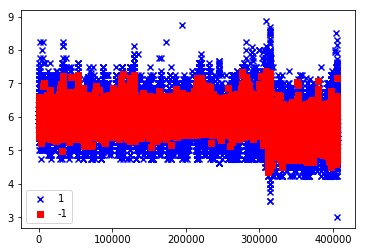

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, ypredtest_RFE, c='r', marker='s', label='-1')
plt.legend(loc='lower left')
plt.show()

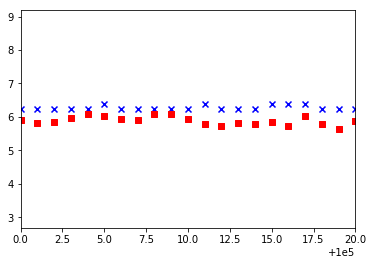

In [91]:
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, ypredtest_RFE, c='r', marker='s', label='-1')
plt.xlim(100000,100020)
plt.show()

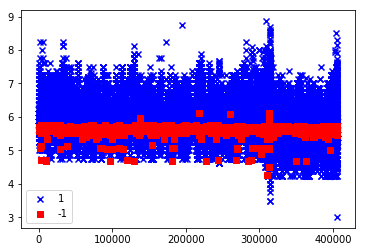

In [92]:
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, ypredtest_mlp, c='r', marker='s', label='-1')
plt.legend(loc='lower left')
plt.show()

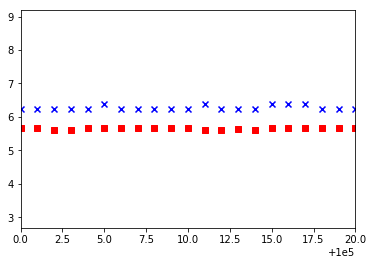

In [93]:
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, ypredtest_mlp, c='r', marker='s', label='-1')
plt.xlim(100000,100020)
plt.show()

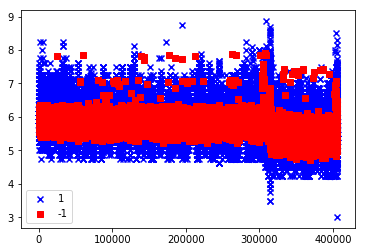

In [94]:
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, test_prediction, c='r', marker='s', label='-1')
plt.legend(loc='lower left')
plt.show()

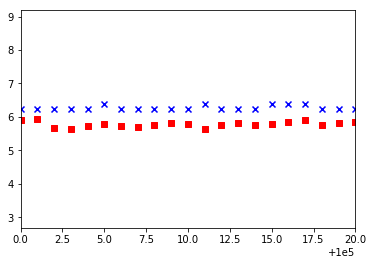

In [95]:
plt.scatter(X_test.index,y_test, c='b', marker='x', label='1')
plt.scatter(X_test.index, test_prediction, c='r', marker='s', label='-1')
plt.xlim(100000,100020)
plt.show()

# Feature Selection

In [96]:
error_metric = pd.DataFrame({'Model':[],
                            'rmse_train':[], 
                            'rmse_test': [],
                            'mae_train': [],
                            'mae_test':[],
                            'mape_train':[],
                            'mape_test':[]})



def calc_error_metric(modelname, model, X_train, y_train, X_test, y_test):
    global error_metric
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    mae_train=mean_absolute_error(y_train, y_train_predicted)
    mae_test=mean_absolute_error(y_test, y_test_predicted)
    
    
    #mse_train=mean_squared_error(y_train, y_train_predicted)
    #mse_test=mean_squared_error(y_test, y_test_predicted)
    
    rmse_train=np.sqrt(mean_squared_error(y_train, y_train_predicted))
    rmse_test=np.sqrt(mean_squared_error(y_test, y_test_predicted))
    
    
    mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
    mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100
   
    #r2_train=r2_score(y_train, y_train_predicted)
    #r2_test=r2_score(y_test, y_test_predicted)
   
    
    df_local = pd.DataFrame({'Model':[modelname],
                            'rmse_train':[rmse_train], 
                            'rmse_test': [rmse_test],
                            'mae_train': [mae_train],
                            'mae_test': [mae_test],
                            'mape_train':[mape_train],
                            'mape_test':[mape_test]})
        
    error_metric = pd.concat([error_metric, df_local])
    return error_metric

In [97]:
#Forward Search

In [98]:
lm2 = LinearRegression()

In [99]:
k = 30
sfs = SFS(lm2, 
          forward=True,
          floating=False,
          k_features=k,
          scoring='neg_mean_squared_error',
          cv=2)




In [100]:
sfs.fit(X_train, y_train.values)

SequentialFeatureSelector(clone_estimator=True, cv=2,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=True, k_features=30, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=0)

In [101]:
#Feature Names
columns = sfs.k_feature_names_
print("Top "+str(k)+" features from Forward Selection Method")
print(columns)

Top 30 features from Forward Selection Method
('fico', 'dt_first_pi', 'cd_msa', 'mi_pct', 'cnt_units', 'cltv', 'dti', 'orig_upb', 'ltv', 'zipcode', 'cnt_borr', 'flag_sc', 'Year', 'OS_P', 'OS_S', 'C_C', 'C_R', 'C_T', 'ppmt_N0', 'FRM', 'CO', 'CP', 'MH', 'PU', 'SF', 'C', 'N', 'P', 'fthb_N', 'fthb_Y')


In [102]:
columnsimp = list(columns)

In [103]:
df_train_fwd = df_train_cleaned[columnsimp]

In [104]:
df_test_fwd = df_test_cleaned[columnsimp]

In [105]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LinearRegression(normalize=True))])
grid_params_lr =[{}]
gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=grid_params_lr, cv=3)
gs_lr.fit(df_train_fwd, y_train)
em=calc_error_metric('Regression30FWD', gs_lr, df_train_fwd, y_train, df_test_fwd, y_test)
print("Regression_"+str(k)+"FWD completed")
print("scores")
score30LR_minmax = em


Regression_30FWD completed
scores


In [106]:
score30LR_minmax

,Model,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test
0,Regression30FWD,0.345011,0.355157,0.263314,0.275643,4.698277,4.703564


In [107]:
print("Scores for test")
scores("Linear Regression",y_test,test_prediction)
print("Scores for train")
scores("Linear Regression",y_train,train_prediction)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.24579004505575627
RMSE   :     0.3222976244659248
MAPE   :     4.195856777807941
Scores for train
The scores for the model :  Linear Regression
MAE    :     0.21296023996230556
RMSE   :     0.28933832294383566
MAPE   :     3.7688328173372856


In [108]:
#Backward Search

In [109]:
k = 30
sbs = SFS(lm2, 
          forward=False,
          floating=False,
          k_features=k,
          scoring='neg_mean_squared_error',
          cv=2)




In [110]:
sbs.fit(X_train.values, y_train.values)

SequentialFeatureSelector(clone_estimator=True, cv=2,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=False, k_features=30, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=0)

In [111]:
#Feature Names
columns = sbs.k_feature_names_
print("Top "+str(k)+" features from Backward Selection Method")
print(columns)

Top 30 features from Backward Selection Method
('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31')


In [112]:
columnsimp = list(columns)

In [113]:
df_cleaned_test_bk = df_test_cleaned


In [114]:
df_cleaned_test_bk.columns = ['0','1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']

In [115]:
df_test_bwd = df_cleaned_test_bk[columnsimp]

In [116]:
df_cleaned_train_bk = df_train_cleaned
df_cleaned_train_bk.columns = ['0','1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
df_train_bwd = df_cleaned_train_bk[columnsimp]

In [117]:
df_train_bwd.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,31
0,699,200505,203504,39300.0,0,1,56,42,190000,56,...,1,0,0,0,0,1,1,0,0,0
1,691,200504,203503,36420.0,25,1,90,36,90000,90,...,1,0,0,0,0,1,0,1,0,0
2,713,200503,203502,28740.0,0,1,72,45,357000,72,...,1,0,0,0,0,1,0,0,1,0
3,719,200505,203504,0.0,0,1,85,47,195000,68,...,1,1,0,0,0,0,0,0,1,0
4,656,200503,203502,40340.0,0,1,68,30,253000,68,...,1,0,0,0,0,1,1,0,0,0


In [118]:
df_test_bwd.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,31
0,715,200508,203507,33700.0,0,1,58,41,214000,58,...,1,0,0,0,0,1,1,0,0,0
1,743,200508,203507,0.0,0,1,80,36,340000,80,...,1,0,0,0,0,1,0,1,0,0
2,772,200508,203507,37860.0,0,1,80,34,184000,80,...,1,0,0,0,1,0,0,0,1,0
3,773,200507,203506,0.0,0,1,64,60,260000,64,...,1,0,0,0,0,1,0,1,0,0
4,647,200508,203507,0.0,30,1,91,28,170000,91,...,1,0,0,0,0,1,0,1,0,0


In [119]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LinearRegression(normalize=True))])
grid_params_lr =[{}]
gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=grid_params_lr, cv=3)
gs_lr.fit(df_train_bwd, y_train)
em=calc_error_metric('Regression_30BWD', gs_lr, df_train_bwd, y_train, df_test_bwd, y_test)
print("Regression_"+str(k)+"BWD completed")
print("scores")
score30LR_std_BK = em

Regression_30BWD completed
scores


In [120]:
score30LR_std_BK

,Model,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test
0,Regression30FWD,0.345011,0.355157,0.263314,0.275643,4.698277,4.703564
0,Regression_30BWD,0.296105,0.326503,0.217244,0.246590,3.840962,4.206193


In [121]:
print("Scores for test")
scores("Linear Regression",y_test,test_prediction)
print("Scores for train")
scores("Linear Regression",y_train,train_prediction)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.24579004505575627
RMSE   :     0.3222976244659248
MAPE   :     4.195856777807941
Scores for train
The scores for the model :  Linear Regression
MAE    :     0.21296023996230556
RMSE   :     0.28933832294383566
MAPE   :     3.7688328173372856


In [122]:
#Without scaling FWD
lm.fit(df_train_fwd,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
train_prediction_fwd=prediction_function(df_train_fwd)
test_prediction_fwd=prediction_function(df_test_fwd)
print("Scores for test")
scores("Linear Regression",y_test,test_prediction_fwd)
print("Scores for train")
scores("Linear Regression",y_train,train_prediction_fwd)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.27564524443263405
RMSE   :     0.3551581102765889
MAPE   :     4.703590611361663
Scores for train
The scores for the model :  Linear Regression
MAE    :     0.26331187855728794
RMSE   :     0.3450113781147228
MAPE   :     4.698239915673019


In [124]:
#Without scaling BWD
lm.fit(df_train_bwd,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
train_prediction_bwd=prediction_function(df_train_bwd)
test_prediction_bwd=prediction_function(df_test_bwd)
print("Scores for test")
scores("Linear Regression",y_test,test_prediction_bwd)
print("Scores for train")
scores("Linear Regression",y_train,train_prediction_bwd)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.24658800772591052
RMSE   :     0.32650076334969547
MAPE   :     4.206166096525667
Scores for train
The scores for the model :  Linear Regression
MAE    :     0.21724411559372211
RMSE   :     0.29610471283575335
MAPE   :     3.840964930190247


In [126]:
efs = EFS(lm2, 
          min_features=2,
          max_features=3,
          scoring='neg_mean_squared_error',
          cv=0)

efs.fit(X_train, y_train)

Features: 5456/5456

ExhaustiveFeatureSelector(clone_estimator=True, cv=0,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             max_features=3, min_features=2, n_jobs=1,
             pre_dispatch='2*n_jobs', print_progress=True,
             scoring='neg_mean_squared_error')

In [127]:
print('Best MSE score: %.2f' % (efs.best_score_*-1))

Best MSE score: 0.09


In [128]:
print('Best subset:', efs.best_idx_,efs.best_feature_names_)

Best subset: (2, 8, 15) ('2', '8', '15')


In [129]:
efs.best_feature_names_

('2', '8', '15')

In [130]:
#Feature Names
columns = efs.best_feature_names_
print("Top "+str(k)+" features from Exauastive Selection Method")
print(columns)

Top 30 features from Exauastive Selection Method
('2', '8', '15')


In [131]:
columnsimp = list(columns)

In [132]:
df_cleaned_test_es = df_test_cleaned[columnsimp]

In [133]:
df_cleaned_train_es = df_train_cleaned[columnsimp]

In [134]:
df_cleaned_test_es.head()

,2,8,15
0,203507,214000,1
1,203507,340000,1
2,203507,184000,1
3,203506,260000,1
4,203507,170000,1


In [135]:
#Without scaling BWD
lm.fit(df_cleaned_train_es,y_train)

test_prediction_est=prediction_function(df_cleaned_test_es)
train_prediction_est=prediction_function(df_cleaned_train_es)


In [136]:
print("Scores for test")
scores("Linear Regression",y_test,test_prediction_est)
print("Scores for train")
scores("Linear Regression",y_train,train_prediction_est)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.253210899451224
RMSE   :     0.3336258914528731
MAPE   :     4.317719753546919
Scores for train
The scores for the model :  Linear Regression
MAE    :     0.22396876754362086
RMSE   :     0.3029722404922929
MAPE   :     3.96172053370561


In [137]:
print("Scores for test")
scores("Linear Regression",y_test,test_prediction)
print("Scores for train")
scores("Linear Regression",y_train,train_prediction)

Scores for test
The scores for the model :  Linear Regression
MAE    :     0.24579004505575627
RMSE   :     0.3222976244659248
MAPE   :     4.195856777807941
Scores for train
The scores for the model :  Linear Regression
MAE    :     0.21296023996230556
RMSE   :     0.28933832294383566
MAPE   :     3.7688328173372856


# Best Model from TPOT

In [138]:
RM = RandomForestRegressor(bootstrap=True, max_features=0.3, min_samples_leaf=6, min_samples_split=4, n_estimators=100)

In [139]:
RM.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [140]:
ypred_best_test = RM.predict(X_test)

In [141]:
ypred_best_train = RM.predict(X_train)

In [142]:
print("Scores for test")
scores("RF - TPOT",y_test,ypred_best_test)
print("Scores for train")
scores("RF - TPOT",y_train,ypred_best_train)

Scores for test
The scores for the model :  RF - TPOT
MAE    :     0.22571406695528873
RMSE   :     0.2950441655218244
MAPE   :     3.9096081972426555
Scores for train
The scores for the model :  RF - TPOT
MAE    :     0.1537671018297871
RMSE   :     0.2110703054006318
MAPE   :     2.7198915371916472


In [143]:
#TO Build the FInal Metrics Table
error_metric_f = pd.DataFrame({'Model_Name':[],
                            'rmse_train':[], 
                            'rmse_test': [],
                            'mae_train': [],
                            'mae_test':[],
                            'mape_train':[],
                            'mape_test':[]})



def metric(modelname,y_train, y_train_predicted, y_test, y_test_predicted):
    global error_metric_f
    
    mae_train=mean_absolute_error(y_train, y_train_predicted)
    mae_test=mean_absolute_error(y_test, y_test_predicted)
    
    
    rmse_train=np.sqrt(mean_squared_error(y_train, y_train_predicted))
    rmse_test=np.sqrt(mean_squared_error(y_test, y_test_predicted))
    
    
    mape_test = np.mean(np.abs((y_test - y_test_predicted) / y_test)) * 100
    mape_train = np.mean(np.abs((y_train - y_train_predicted) / y_train)) * 100

    df_local = pd.DataFrame({'Model_Name':[modelname],
                            'rmse_train':[rmse_train], 
                            'rmse_test': [rmse_test],
                            'mae_train': [mae_train],
                            'mae_test': [mae_test],
                            'mape_train':[mape_train],
                            'mape_test':[mape_test]})
        
    error_metric_f = pd.concat([error_metric_f, df_local])
    return error_metric_f

In [144]:
metric('RF-TPOT', y_train,ypred_best_train,y_test,ypred_best_test)

metric('Linear Regression - No scaling', y_train,train_prediction,y_test,test_prediction)

metric('RFE-PIPELINE', y_train,ypredtrain_RFE,y_test,ypredtest_RFE)

metric('MLP', y_train,ypredtrain_mlp,y_test,ypredtest_mlp)

metric('LR30-FWD', y_train,train_prediction_fwd,y_test,test_prediction_fwd)

metric('LR30-BWD', y_train,train_prediction_bwd,y_test,test_prediction_bwd)

metric('LR3-EST', y_train,train_prediction_est,y_test,test_prediction_est)

,Model_Name,rmse_train,rmse_test,mae_train,mae_test,mape_train,mape_test
0,RF-TPOT,0.211070,0.295044,0.153767,0.225714,2.719892,3.909608
0,Linear Regression - No scaling,0.289338,0.322298,0.212960,0.245790,3.768833,4.195857
0,RFE-PIPELINE,0.102774,0.311912,0.074931,0.240048,1.325594,4.170934
0,MLP,0.367113,0.372517,0.281739,0.288830,5.023967,4.917731
0,LR30-FWD,0.345011,0.355158,0.263312,0.275645,4.698240,4.703591
0,LR30-BWD,0.296105,0.326501,0.217244,0.246588,3.840965,4.206166
0,LR3-EST,0.302972,0.333626,0.223969,0.253211,3.961721,4.317720


In [145]:
############################################################################
#MLP pipeline
#est= MLPRegressor()
#minmax_scaler = preprocessing.MinMaxScaler()
#selector = feature_selection.RFE(est)
#pipe_params = [('feat_selection',selector),('std_scaler', minmax_scaler), ('clf', est)]
#pipe = Pipeline(pipe_params)
#param_grid = {'clf__activation' : ['tanh', 'relu']}
#clf = GridSearchCV(pipe, param_grid=param_grid, cv = 2, n_jobs = -1, verbose=3, refit=True)
#clf.fit(X_train, y_train)
############################################################################